In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
h = 0.01
n_max = 200

# t_values = [i*h for i in range(1, n_max+1)]

y = 1
t_values = [0]
y_values = [y0]

for i in range(1, n_max+1):
    f = -y
    y = y + (f*h)
    
    t_values += [i*h]
    y_values += [y]
#end-for

In [50]:
# t_test = np.linspace(start=0, stop=n_max*h, num=n_max)
# t_test
y_test = 1.*np.exp(-np.array(t_values))

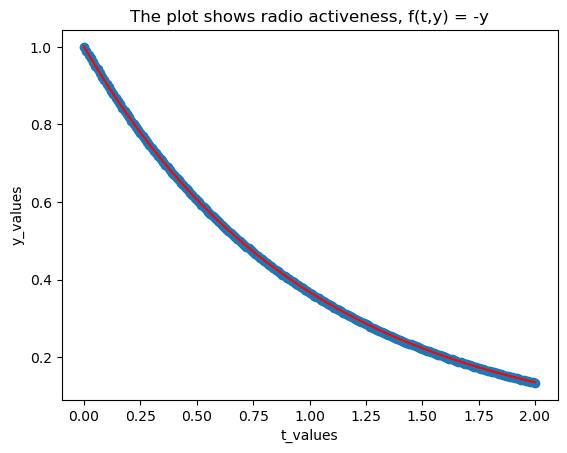

In [51]:
plt.scatter(t_values, y_values)
plt.plot(t_values, y_test, color='red')
plt.xlabel('t_values')
plt.ylabel('y_values')
plt.title('The plot shows radio activeness, f(t,y) = -y')
plt.show()

In [54]:
def eulerODE(args):
    # f code
    None
#end-def

In [61]:
def eulerODE(t0, y0):
    return fun(t0, y0)
#end-def

def fun(t, y):
    return -y
#end-def

t0 = 0
y0 = 1

value = eulerODE(t0, y0)
value

-1

In [62]:
from scipy.integrate import solve_ivp

In [100]:
def exponential_decay(t, y):
    return -0.5 * y
#end-def

In [101]:
sol = solve_ivp(fun=exponential_decay, t_span=[0, 10], y0=[0, 2, 4, 6, 8, 10])

In [102]:
print(sol.t)

[ 0.          0.11698871  1.28687581  3.11546345  4.90122642  6.6899179
  8.47898072 10.        ]


In [99]:
print(sol.y)
print(sol.y.shape)

[[ 0.00000000e+00 -2.50000000e-09 -3.02500000e-07 -3.08025000e-05
  -3.08580250e-03 -3.08635803e-01 -2.50000000e+01]
 [ 2.00000000e+00  2.00000000e+00  1.99999970e+00  1.99996920e+00
   1.99691420e+00  1.69136420e+00 -2.30000000e+01]
 [ 4.00000000e+00  4.00000000e+00  3.99999970e+00  3.99996920e+00
   3.99691420e+00  3.69136420e+00 -2.10000000e+01]
 [ 6.00000000e+00  6.00000000e+00  5.99999970e+00  5.99996920e+00
   5.99691420e+00  5.69136420e+00 -1.90000000e+01]
 [ 8.00000000e+00  8.00000000e+00  7.99999970e+00  7.99996920e+00
   7.99691420e+00  7.69136420e+00 -1.70000000e+01]
 [ 1.00000000e+01  1.00000000e+01  9.99999970e+00  9.99996920e+00
   9.99691420e+00  9.69136420e+00 -1.50000000e+01]]
(6, 7)


In [127]:
def equation(x):
    return (x**4.0) - (2.0*x) + 1.0
#end-def

# equation(3)

N = 100
a = 0.0
b = 2.0
h = (b-a)/N

s = (0.5*equation(a)) + (0.5*equation(b))
# print(s)

for k in range(1, N):
    s += equation(a+(k*h))
#end-for

print(s*h)

4.401066656


In [3]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [137]:
class NN(nn.Module):
    def __init__(self,):
        super(NN, self,).__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=2, out_features=20, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=20, out_features=30, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=30, out_features=30, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=30, out_features=20, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=20, out_features=20, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=20, out_features=1, bias=True),
        )
    #end-def
    def forward(self, x):
        return self.network(x)
    #end-def
#end-class

model = NN()
print(model)

NN(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=30, bias=True)
    (5): Tanh()
    (6): Linear(in_features=30, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): Tanh()
    (10): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [113]:
class MyPINN:
    def __init__(self,):
        device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        
        # compute domain:
        self.h = 0.1
        self.k = 0.1
        
        x = torch.arange(start=-1, end=1+self.h, step=self.h)
        t = torch.arange(start= 0, end=1+self.h, step=self.k)
        
        self.X = torch.cartesian_prod(x, t)
        
        # training data:
        bc1 = torch.cartesian_prod(torch.unsqueeze(x[0],  dim=0), t)
        bc2 = torch.cartesian_prod(torch.unsqueeze(x[-1], dim=0), t)
        ic = torch.cartesian_prod(x, torch.unsqueeze(t[0], dim=0))
        # Process: tensor(-1) --> tensor([-1]) torch.unsqueeze(x[0], dim=0) # row-wise
        # ref: https://pytorch.org/docs/stable/generated/torch.unsqueeze.html
        
        self.X_train = torch.vstack((bc1, ic, bc2))
        
        y_bc1 = torch.zeros(size=(len(bc1),)) # [0...0]
        y_bc2 = torch.zeros(size=(len(bc2),)) # [0...0]
        
        y_ic  = -torch.sin(torch.tensor(np.pi)*ic[:,0])
        # [-sin(π x -1.0), -sin(π x -0.9), ..., -sin(π x 0), ..., -sin(π x 0.9), -sin(π x 1.0)]
        
        self.y_train = torch.hstack((y_bc1, y_ic, y_bc2)) # [0...0, sin(π x x), 0...0]
    #end-def
#end-class

In [120]:
print(-torch.sin(torch.tensor(np.pi)*ic[:,0]))
print(-torch.sin(torch.tensor(np.pi)*-1))
print(-torch.sin(torch.tensor(np.pi)*1))

tensor([-8.7423e-08,  3.0902e-01,  5.8779e-01,  8.0902e-01,  9.5106e-01,
         1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8779e-01,  3.0902e-01,
         9.3627e-09, -3.0902e-01, -5.8779e-01, -8.0902e-01, -9.5106e-01,
        -1.0000e+00, -9.5106e-01, -8.0902e-01, -5.8779e-01, -3.0902e-01,
         8.7423e-08])
tensor(-8.7423e-08)
tensor(8.7423e-08)


In [192]:
# # h = 0.1
# # x_test = torch.arange(start=-1, end=1+h, step=h)
# # print(x_test)

# # t_test = torch.arange(start=0, end=1+h, step=h)
# # print(t_test)

# x = torch.tensor([1, 2, 3])
# y = torch.tensor([4, 5, 6])

# v = torch.meshgrid(x, y)
# print(v)

# v = torch.meshgrid(y, x)
# print(v)

In [193]:
# x = torch.arange(1, 3+1, 1)
# y = torch.arange(4, 6, 1)
# xx, yy = torch.meshgrid(x=y, y=x, indexing='ij')
# # z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
# print(xx.shape)
# print(xx)
# print(yy.shape)
# print(yy)

In [194]:
# help(torch.meshgrid)

In [195]:
# x = np.arange(-5, 5+1, 1)
# y = np.arange(-5, 5+1, 1)
# xx, yy = np.meshgrid(x, y)

# print(x)
# print(xx)

# print(y)
# print(yy)
# # z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
# # h = plt.contourf(x,y,z)
# # plt.show()

In [196]:
# help(torch.arange)

In [197]:
# help(np.arange)

In [109]:
h = 0.1
x = torch.arange(start=-1, end=1+h, step=h)
# print(x)

t = torch.arange(start=0, end=1+h, step=h)
# print(t)

# # X = torch.stack(torch.meshgrid(x_test, t_test), dim=0).reshape(2, -1).T

# X = torch.vstack(torch.meshgrid(x_test, t_test, indexing='ij')).reshape(2, -1).T

# print(X)
# print(X.shape)

bc1 = torch.cartesian_prod(torch.unsqueeze(x[0], dim=0), t)
bc2 = torch.cartesian_prod(torch.unsqueeze(x[-1], dim=0), t)
ic = torch.cartesian_prod(x, torch.unsqueeze(t[0], dim=0))

# print(ic)

# X_train = torch.cat([bc1, bc2, ic])
X_train = torch.vstack((bc1, ic, bc2))

# print(bc1)
# print(bc2)
# print(ic)
# print(X_train)
y_bc1 = torch.zeros(size=(len(bc1),))
y_bc2 = torch.zeros(size=(len(bc2),))
y_ic  = torch.sin(torch.tensor(np.pi)*ic[:,0])
# print(y_ic)

y_train = torch.hstack((y_bc1, y_ic, y_bc2))
print(y_train)

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  8.7423e-08, -3.0902e-01, -5.8779e-01, -8.0902e-01,
        -9.5106e-01, -1.0000e+00, -9.5106e-01, -8.0902e-01, -5.8779e-01,
        -3.0902e-01, -9.3627e-09,  3.0902e-01,  5.8779e-01,  8.0902e-01,
         9.5106e-01,  1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8779e-01,
         3.0902e-01, -8.7423e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00])


In [124]:
x[0]

tensor(-1.)

In [160]:
# torch.set_printoptions(sci_mode=False, precision=3)
# y_bc1 = [-torch.sin(torch.tensor(np.pi)*x[0]) for _ in range(len(bc1))]
# print(y_bc1)

[tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000), tensor(    -0.000)]


In [157]:
# np.set_printoptions(suppress=True)
# np.array([.000000035])

torch.set_printoptions(sci_mode=False, precision=4)
torch.tensor([0.35])

tensor([0.3500])

In [147]:
help(torch.set_printoptions)

Help on function set_printoptions in module torch._tensor_str:

set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)
    Set options for printing. Items shamelessly taken from NumPy
    
    Args:
        precision: Number of digits of precision for floating point output
            (default = 4).
        threshold: Total number of array elements which trigger summarization
            rather than full `repr` (default = 1000).
        edgeitems: Number of array items in summary at beginning and end of
            each dimension (default = 3).
        linewidth: The number of characters per line for the purpose of
            inserting line breaks (default = 80). Thresholded matrices will
            ignore this parameter.
        profile: Sane defaults for pretty printing. Can override with any of
            the above options. (any one of `default`, `short`, `full`)
        sci_mode: Enable (True) or disable (False) scientific n

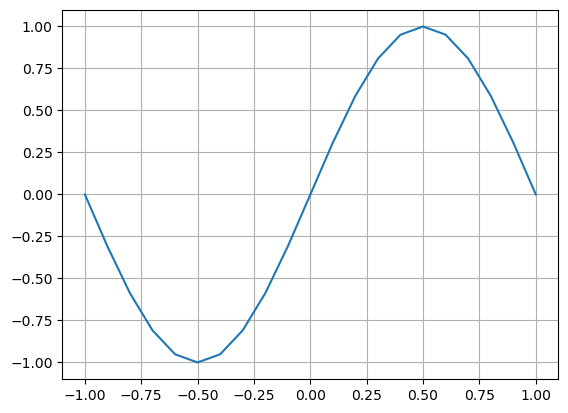

In [103]:
plt.plot(ic[:,0], y_ic)
plt.grid()
plt.show()

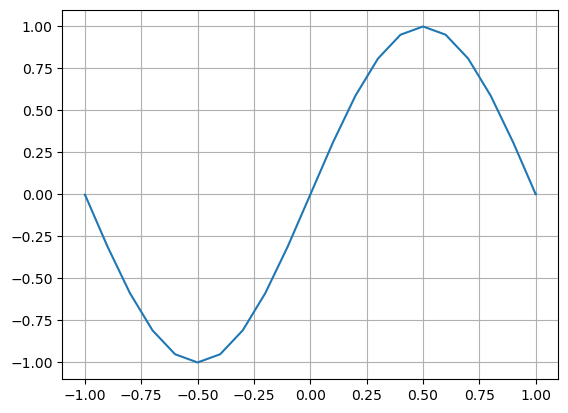

In [112]:
plt.plot(X_train[:,0], y_train)
plt.grid()
plt.show()

In [50]:
# # tensor(-1) --> tensor([-1])
# V = torch.tensor([1, 2, 3, 4, 5])
# v = V[0]
# print(v)

# for i in range(10):
#     v = torch.unsqueeze(v, dim=0)
#     print(v)
#     print(v.shape)
# #end-for

In [59]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
z = torch.tensor([7, 8, 9])

v = torch.vstack((x, y, z))
print(v)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [60]:
help(torch.vstack)

Help on built-in function vstack in module torch:

vstack(...)
    vstack(tensors, *, out=None) -> Tensor
    
    Stack tensors in sequence vertically (row wise).
    
    This is equivalent to concatenation along the first axis after all 1-D tensors have been reshaped by :func:`torch.atleast_2d`.
    
    Args:
        tensors (sequence of Tensors): sequence of tensors to concatenate
    
    Keyword args:
        out (Tensor, optional): the output tensor.
    
    Example::
    
        >>> a = torch.tensor([1, 2, 3])
        >>> b = torch.tensor([4, 5, 6])
        >>> torch.vstack((a,b))
        tensor([[1, 2, 3],
                [4, 5, 6]])
        >>> a = torch.tensor([[1],[2],[3]])
        >>> b = torch.tensor([[4],[5],[6]])
        >>> torch.vstack((a,b))
        tensor([[1],
                [2],
                [3],
                [4],
                [5],
                [6]])



In [218]:
torch.tensor(np.pi)*3

tensor(9.4248)

In [12]:
# x = torch.randn(size=(2, 3))
# print(x)
# help(torch.cat)

In [43]:
# a = torch.tensor([1])
# print(a[0])
# b = torch.tensor([4, 5])
# # torch.cartesian_prod(a, b)

h = 0.1
x_test = torch.arange(start=-1, end=1+h, step=h)
print(x_test)

t_test = torch.arange(start=0, end=1+h, step=h)
print(t_test)

v = torch.cartesian_prod(torch.unsqueeze(x_test[0], dim=0), t_test)
# print(v)
# print(v.shape)
print(v)
# torch.unsqueeze(x_test[0], dim=0)

tensor([-1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00])
tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
tensor([[-1.0000,  0.0000],
        [-1.0000,  0.1000],
        [-1.0000,  0.2000],
        [-1.0000,  0.3000],
        [-1.0000,  0.4000],
        [-1.0000,  0.5000],
        [-1.0000,  0.6000],
        [-1.0000,  0.7000],
        [-1.0000,  0.8000],
        [-1.0000,  0.9000],
        [-1.0000,  1.0000]])


In [52]:
# help(torch.unsqueeze)

In [51]:
# help(torch.cartesian_prod)